In [1]:
import sys 
sys.path.append('../fsp')
import monteCarloSimulation as mcs
import bapm_exact as be
import numpy as np
import math

In [2]:
# Example from the notes
S0 = 4
K = 5
u = 2
d = 0.5
r = 0.25

exp = be.bapm_exact(u, d, r, S0)
exp.setOption(True, True, K, 1)
assert(exp.stockPrice(3, 0) == S0 * d **3)
assert(exp.stockPrice(0, 3) == S0 * u **3)

In [3]:
V0 = exp.pathIndependentExpectedValue(2,exp.riskNeutralProbability())
print("V0: ", V0)


V0:  (array([1.76]), 4.000000000000001)


In [4]:
V0 = exp.singleStepReplicatingPortfolio(0, 0)
print("V0: ", V0)

V0:  [ 0. -0.]


In [5]:
maxPathLength = 4
exp.generateAllPaths(2)

[[0, 0], [0, 1], [1, 0], [1, 1]]

In [6]:
exp.recursiveReplicatingPortfolio(3)
exp.replicatingDeltas

[array([0.8]),
 array([0.2]),
 array([1.8]),
 array([-0.]),
 array([0.5]),
 array([0.5]),
 array([4.]),
 None]

The deltas are not path independent. 

In [7]:
# Example from the notes
S0 = 1
u = 1.1
d = 1.01
r = 0.05
N = 5
K = (1+r)**N * S0


exp = be.bapm_exact(u, d, r, S0)
exp.setOption(True, True, K, N)
p_tilda = exp.riskNeutralProbability()
V0 = exp.pathIndependentExpectedValue(N, p_tilda)
print("V0: ", V0[0], "SN: ", V0[1])

V0 = exp.pathIndependentExpectedValue(N, p_tilda - 0.2)
print("V0: ", V0[0], "SN: ", V0[1])

V0 = exp.pathIndependentExpectedValue(N, p_tilda + 0.2)
print("V0: ", V0[0], "SN: ", V0[1])

V0 = exp.recursiveReplicatingPortfolio(N)
print("V0: ", V0[0], "Deltas (in a binary tree): ", V0[1])


V0:  [0.03903148] SN:  0.9999999999999994
V0:  [0.00769095] SN:  0.9171745411267206
V0:  [0.09934961] SN:  1.0887038735338368
V0:  [0.03903148] Deltas (in a binary tree):  [array([0.53518931]), array([0.35939113]), array([0.81514582]), array([0.16218839]), array([0.64632605]), array([0.64632605]), array([1.11787445]), array([-0.]), array([0.38317008]), array([0.38317008]), array([1.0479827]), array([0.38317008]), array([1.0479827]), array([1.0479827]), array([1.331]), array([-0.]), array([-0.]), array([-0.]), array([0.90523931]), array([-0.]), array([0.90523931]), array([0.90523931]), array([1.34431]), array([-0.]), array([0.90523931]), array([0.90523931]), array([1.34431]), array([0.90523931]), array([1.34431]), array([1.34431]), array([1.4641]), None]


Monte Carlo


In [8]:
S0 = 1
u = 1.1
d = 1.01
r = 0.05
N = 5
K = (1+r)**N * S0


mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=S0)
mc.setOption(True, True, K, N)
mc.setRNG(np.random.seed(654321))
print(p_tilda)
S, V = mc.simulatePathDependent(1, 5, 2**21, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))


0.4444444444444444
V0:  0.039054540012345595 SN:  1.0000175384566599


In [9]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=S0)
mc.setOption(True, True, K, N)
mc.setRNG(np.random.seed(22))
print(p_tilda)
S, V = mc.simulatePathDependent(S0, N, 32, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 256, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**10, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**11, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**21, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

0.4444444444444444
V0:  0.12715902257375636 SN:  1.1271590225737564
V0:  0.13731002777041817 SN:  1.1373100277704182
V0:  0.13636804886338527 SN:  1.1363680488633854
V0:  0.13616192695820756 SN:  1.1361619269582075
V0:  0.13607262784954957 SN:  1.136072627849549


In [10]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

ep = be.bapm_exact(u, d, r, S0)
ep.setOption(True, True, K, N)
p_tilda = ep.riskNeutralProbability()
p = p_tilda * 0.9

paths = ep.generateRandomPaths(maxPathLength=10, numPaths=5, p=p)
SA_10 = ep.stockPrice(len(paths[0])-np.sum(paths, axis=1), np.sum(paths, axis=1))

import random
for SE in SA_10:
    mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=SE)
    mc.setRNG(np.random.seed(random.randint(0, 2**32)))
    mc.setOption(True, True, K, N)
    S, V = mc.simulatePathDependent(S0, N, 2**21, p_tilda)
    print("SA: ", SE, " V0: ", np.mean(V), " SN: ", np.mean(S), " S - SE: ", np.mean(S) - SE)


SA:  1.0059048618844324  V0:  0.0108362576629468  SN:  1.0059049813884184  S - SE:  1.1950398604021473e-07
SA:  1.0059048618844324  V0:  0.010825817927940585  SN:  1.0058898622981756  S - SE:  -1.4999586256836395e-05
SA:  1.010833302863568  V0:  0.014122731951511026  SN:  1.0108472562248352  S - SE:  1.3953361267082798e-05
SA:  1.0059048618844324  V0:  0.010846680637472945  SN:  1.0059302584716252  S - SE:  2.5396587192805242e-05
SA:  1.0059048618844324  V0:  0.010838764140380975  SN:  1.0058999071077652  S - SE:  -4.954776667176475e-06
SA:  1.0059048618844324  V0:  0.010832152171022794  SN:  1.0058901856246736  S - SE:  -1.4676259758816812e-05
SA:  1.010833302863568  V0:  0.014115763835912573  SN:  1.0108342012367422  S - SE:  8.983731740741518e-07
SA:  1.010833302863568  V0:  0.014128050790186772  SN:  1.0108517056507922  S - SE:  1.8402787224092165e-05
SA:  1.010833302863568  V0:  0.01410940739004191  SN:  1.0108238260011977  S - SE:  -9.47686237040557e-06
SA:  1.010833302863568  V0

KeyboardInterrupt: 

In [11]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

ep = be.bapm_exact(u, d, r, S0)
ep.setOption(True, True, K, N)
p_tilda = ep.riskNeutralProbability()
p = p_tilda * 0.9

paths = ep.generateRandomPaths(maxPathLength=10, numPaths=1, p=p)
SA_10 = ep.stockPrice(len(paths[0])-np.sum(paths, axis=1), np.sum(paths, axis=1))

S_samples = []

import random
for SE in SA_10:
    for i in range(1):
        mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=SE)
        mc.setRNG(np.random.seed(random.randint(0, 2**16)))
        mc.setOption(True, True, K, N)
        S, V = mc.simulatePathDependent(S0, N, 2**21, p_tilda)
        print("SA: ", SE, " V0: ", np.mean(V), " SN: ", np.mean(S), " S - SE: ", np.mean(S) - SE)
        S_samples.append(np.mean(S))

print("Mean: ", np.mean(S_samples), " Std: ", np.var(S_samples, ddof=1))


SA:  1.0157858907888069  V0:  0.017853392025383916  SN:  1.0157920689662256  S - SE:  6.1781774187696925e-06
Mean:  1.0157920689662256  Std:  nan


/home/jacob/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/jacob/.local/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(array([1.]),
 array([0.51579207, 1.51579207]),
 <BarContainer object of 1 artists>)

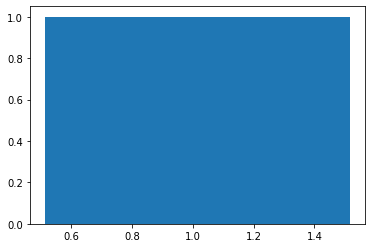

In [12]:
import matplotlib.pyplot as plt
plt.hist(S_samples, bins='auto')

In [13]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=S0)
mc.setOption(True, True, K, N)
mc.setRNG(np.random.seed(22))
print(p_tilda)
S, V = mc.simulatePathDependent(S0, N, 32, p_tilda, True)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 256, p_tilda, True)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**10, p_tilda, True)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**11, p_tilda,  True)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**21, p_tilda,  True)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

0.18367346938773846
V0:  0.01313566276289144 SN:  1.0047817880616778
V0:  0.014408226603147948 SN:  0.9993814901162792
V0:  0.013957546511675668 SN:  1.0004926533543639
V0:  0.014314933860635294 SN:  1.00003485647646
V0:  0.014200514450890257 SN:  0.9999966700088878


In [14]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

ep = be.bapm_exact(u, d, r, S0)
ep.setOption(True, True, K, N)
p_tilda = ep.riskNeutralProbability()
p = p_tilda * 0.9

paths = ep.generateRandomPaths(maxPathLength=10, numPaths=5, p=p)
SA_10 = ep.stockPrice(len(paths[0])-np.sum(paths, axis=1), np.sum(paths, axis=1))

import random
for SE in SA_10:
    mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=SE)
    mc.setRNG(np.random.seed(random.randint(0, 2**32)))
    mc.setOption(True, True, K, N)
    S, V = mc.simulatePathDependent(S0, N, 2**21, p_tilda, True)
    print("SA: ", SE, " V0: ", np.mean(V), " SN: ", np.mean(S), " S - SE: ", np.mean(S) - SE)


SA:  1.0059048618844324  V0:  0.014182862573316848  SN:  1.0000143904873124  S - SE:  -0.005890471397119956
SA:  1.0059048618844324  V0:  0.014194452428676015  SN:  0.9999932863406583  S - SE:  -0.0059115755437740836
SA:  1.010833302863568  V0:  0.014192724007013416  SN:  1.0000002214026107  S - SE:  -0.010833081460957406
SA:  1.0059048618844324  V0:  0.014196231791008101  SN:  0.9999819371634198  S - SE:  -0.0059229247210126346
SA:  1.0059048618844324  V0:  0.01419492103374683  SN:  0.9999871423009519  S - SE:  -0.00591771958348053


In [17]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

ep = be.bapm_exact(u, d, r, S0)
ep.setOption(True, True, K, N)
p_tilda = ep.riskNeutralProbability()
p = p_tilda * 0.9

paths = ep.generateRandomPaths(maxPathLength=10, numPaths=1, p=p)
SA_10 = ep.stockPrice(len(paths[0])-np.sum(paths, axis=1), np.sum(paths, axis=1))



import random
for SE in SA_10:
    for i in range(25):
        mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=SE)
        mc.setRNG(np.random.seed(random.randint(0, 2**16)))
        mc.setOption(True, True, K, N)
        S, V = mc.simulatePathDependent(S0, N, 2**21, p_tilda, True)
        print("SA: ", SE, " V0: ", np.mean(V), " SN: ", np.mean(S), " S - SE: ", np.mean(S) - SE)
        S_samples.append(np.mean(S))

print("Mean: ", np.mean(S_samples), " Std: ", np.var(S_samples, ddof=1))


SA:  1.0207627439683542  V0:  0.014187927357209095  SN:  0.9999904380353998  S - SE:  -0.020772305932954427
SA:  1.0207627439683542  V0:  0.014188233814624546  SN:  1.0000042193954404  S - SE:  -0.020758524572913828
SA:  1.0207627439683542  V0:  0.014193252132845  SN:  0.9999876474509893  S - SE:  -0.020775096517364866
SA:  1.0207627439683542  V0:  0.014175218085263466  SN:  1.000009381224827  S - SE:  -0.020753362743527237
SA:  1.0207627439683542  V0:  0.014187696714794239  SN:  0.9999930912232017  S - SE:  -0.020769652745152523
SA:  1.0207627439683542  V0:  0.01420725961189876  SN:  0.9999728172391786  S - SE:  -0.020789926729175567
SA:  1.0207627439683542  V0:  0.014199561419943248  SN:  0.999975889398861  S - SE:  -0.02078685456949325
SA:  1.0207627439683542  V0:  0.014180755375836077  SN:  1.0000178398749227  S - SE:  -0.02074490409343155
SA:  1.0207627439683542  V0:  0.01419839103027711  SN:  0.999987106484708  S - SE:  -0.020775637483646192
SA:  1.0207627439683542  V0:  0.014188

(array([4., 5., 4., 4., 6., 2.]),
 array([0.99997015, 0.99998049, 0.99999082, 1.00000116, 1.00001149,
        1.00002183, 1.00003216]),
 <BarContainer object of 6 artists>)

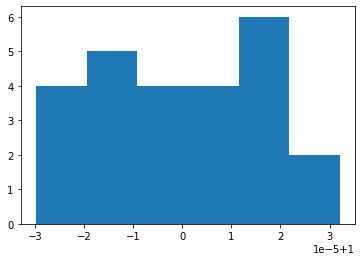

In [16]:
import matplotlib.pyplot as plt
plt.hist(S_samples, bins='auto')